In [1]:
import pandas as pd
from pandas import DataFrame
import pickle
import quandl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight') #538

In [4]:
api_key = '-XEHkm6dVEY_jr4Qi3eV'
df = quandl.get("FMAC/HPI_TX", authtoken=api_key)
print(df.head())

                Value
Date                 
1975-01-31  32.659989
1975-02-28  32.970745
1975-03-31  33.542148
1975-04-30  34.383316
1975-05-31  34.652016


In [3]:
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()#uses def within def

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.columns=[str(abbv)]
        print(query)
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states.pickle','wb') #write bites in newly created pickle file 'fiddy_states.pickle'
    pickle.dump(main_df, pickle_out)#dump the main_df DF into the pickle_out file
    pickle_out.close()  

    
grab_initial_state_data()

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


In [4]:
#we read the house price index

pickle_in = open('fiddy_states.pickle','rb')
HPI_data = pickle.load(pickle_in)
print(HPI_data.head())#we go further with this code in the tutorial

                   AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.324038  34.400087  28.886571  36.838213  15.665713  19.666460   
1975-02-28  35.545343  34.911194  29.374322  37.149935  15.721510  19.894520   
1975-03-31  35.803942  35.434316  29.828662  37.420977  15.912556  20.118681   
1975-04-30  36.120498  35.980265  30.179479  37.642638  16.225479  20.327062   
1975-05-31  36.421849  36.576786  30.371230  37.864617  16.486814  20.497741   

                   CT         DE         FL         GA    ...             SD  \
Date                                                      ...                  
1975-01-31  24.530646  27.146975  30.903838  30.862154    ...      37.861487   
1975-02-28  25.051659  27.185646  32.121077  30.583518    ...      37.445064   
1975-03-31  25.443161  27.252283  33.931871  30.466267    ...      37.021567   
1975-04-30  25.663172  27.389022  36.14

In [5]:
HPI_data['TX2']=HPI_data['TX']*2   #modifying columns
print (HPI_data[['TX', 'TX2']].head())

                   TX        TX2
Date                            
1975-01-31  32.659989  65.319979
1975-02-28  32.970745  65.941491
1975-03-31  33.542148  67.084297
1975-04-30  34.383316  68.766633
1975-05-31  34.652016  69.304031


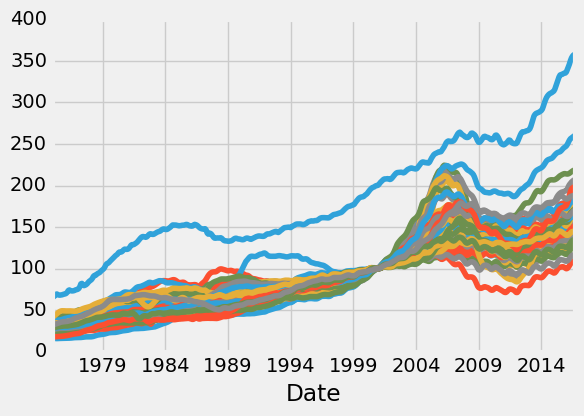

In [6]:
HPI_data.plot()
plt.legend().remove()
plt.show()

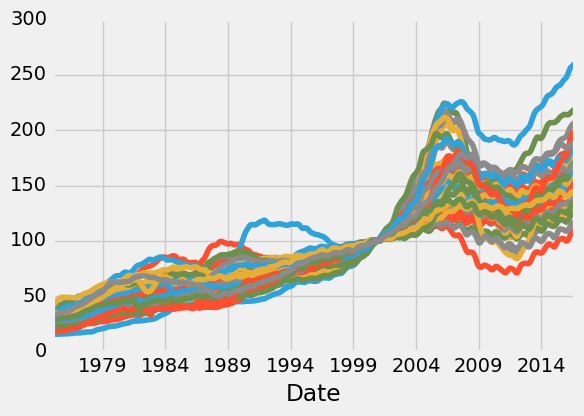

In [14]:
def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    print(main_df.head())
    
    pickle_out = open('fiddy_states.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

#grab_initial_state_data()   

HPI_data = pd.read_pickle('fiddy_states.pickle')

HPI_data.plot()
plt.legend().remove()
plt.show()

In [ ]:
def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states:
        query = "FMAC/HPI_"+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        print(query)
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        print(df.head())
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
            
    pickle_out = open('fiddy_states3.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()

#grab_initial_state_data()   

HPI_data = pd.read_pickle('fiddy_states3.pickle')

HPI_data.plot()
plt.legend().remove()
plt.show()

In [5]:
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

In [26]:
HPI_state_correlat=HPI_data.corr()
print (HPI_state_correlat)

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.946418  0.937592  0.995119  0.942310  0.965541  0.953146   
AK  0.946418  1.000000  0.910237  0.967983  0.921818  0.960382  0.884600   
AZ  0.937592  0.910237  1.000000  0.936454  0.976776  0.919486  0.917688   
AR  0.995119  0.967983  0.936454  1.000000  0.945774  0.976929  0.944746   
CA  0.942310  0.921818  0.976776  0.945774  1.000000  0.938870  0.942463   
CO  0.965541  0.960382  0.919486  0.976929  0.938870  1.000000  0.889392   
CT  0.953146  0.884600  0.917688  0.944746  0.942463  0.889392  1.000000   
DE  0.982824  0.938068  0.948801  0.977921  0.967911  0.936764  0.979810   
FL  0.929395  0.900713  0.994380  0.928081  0.985869  0.910895  0.926355   
GA  0.978346  0.899525  0.949167  0.968410  0.951573  0.956025  0.947469   
HI  0.944752  0.947413  0.916923  0.951617  0.951263  0.928241  0.915631   
ID  0.983136  0.953404  0.965198  0.980867  0.954768  0.962413  0.917955   
IL  0.983692

In [42]:
TX1yr = HPI_data['TX'].resample('A')
print(TX1yr.head())

Date
1975-12-31    33.966989
1976-12-31    36.404411
1977-12-31    40.063529
1978-12-31    46.005290
1979-12-31    53.381091
Freq: A-DEC, Name: TX, dtype: float64


C:\Users\Olga and Jean\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  from ipykernel import kernelapp as app


In [ ]:
Resample rule:
xL for milliseconds
xMin for minutes
xD for Days

Alias	Description
B	business day frequency
C	custom business day frequency (experimental)
D	calendar day frequency
W	weekly frequency
M	month end frequency
BM	business month end frequency
CBM	custom business month end frequency
MS	month start frequency
BMS	business month start frequency
CBMS	custom business month start frequency
Q	quarter end frequency
BQ	business quarter endfrequency
QS	quarter start frequency
BQS	business quarter start frequency
A	year end frequency
BA	business year end frequency
AS	year start frequency
BAS	business year start frequency
BH	business hour frequency
H	hourly frequency
T	minutely frequency
S	secondly frequency
L	milliseonds
U	microseconds
N	nanoseconds

How:
mean, sum, ohlc